# Titanic demographic data is used for the analysis below
https://www.kaggle.com/c/titanic/data

According to Wiki
 
Of the 2,224 people on board the ship; 1,343 of them were passengers and 885 were crew members. There were only enough lifeboats on board the ship to hold 1,178 people. Most common number of survivors reported is 705. Millvina Dean was one of youngest 9 months old survivor. 

Age/gender 	Class/crew 	Number aboard 	Number saved 	Number lost 	Percentage saved 	Percentage lost

      Children 	First Class 	6 	5 	1 	83% 	17%
                Second Class 	24 	24 	0 	100% 	0%
                Third Class 	79 	27 	52 	34% 	66%

        Women 	First Class 	144 	140 	4 	97% 	3%
                Second Class 	93 	80 	13 	86% 	14%
                Third Class 	165 	76 	89 	46% 	54%
                        Crew 	23 	20 	3 	87% 	13%

           Men 	First Class 	175 	57 	118 	33% 	67%
                Second Class 	168 	14 	154 	8% 	92%
                Third Class 	462 	75 	387 	16% 	84%
                        Crew 	885 	192 	693 	22% 	78%
                      Total 	2224 	710 	1514 	32% 	68%


<font color='Blue'> Questions that we expect to answer using this data <br>

1. Who were the youngest and oldest passengers on Titanic? Did they survive the disaster?<br>

2. What all were the factors on which Survival of a passenger depend?<br>

3. How did gender of passengers impact the Survival?<br>

4. How did the social status of passengers impact their survival?<br>

5. How did the age of passengers impact their survival?<br>

6. How does the age/status graph looked for survivors/non survivors?<br>

7. What was female child to male child ratio of survivors and non survivors<br>

8. How many families travelling remained intact<br>

9. How did survival data by the location of embarkment look<br>

10. Explore NaNs in columns </font>

In [1]:
#import libraries used for analysis
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data and splitting into survival and non survival group

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

print titanic_df.keys()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [3]:
#looking at the top and bottom data

print titanic_df.head(10)
print titanic_df.tail(10)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male   54      

<font color='green'> Data fields Age, Cabin have NaN values.</font>


In [4]:
#How many passenger data does not have value in which columns
print 'Of ' + str(len(titanic_df)) + ' passenger records '

for col in titanic_df:
    print col
    print titanic_df[col].isnull().sum()
    
print ' records have no values in respective columns'


Of 891 passenger records 
PassengerId
0
Survived
0
Pclass
0
Name
0
Sex
0
Age
177
SibSp
0
Parch
0
Ticket
0
Fare
0
Cabin
687
Embarked
2
 records have no values in respective columns


<font color='green'> There are 177 records that have no age values. Hence a histogram of age of passengers would not represent the data correctly. If these records are replaced with 0 values then we would introduce outliers in data. This missing age data can also be replaced by mean age values using the following piece of code<br>

#mean_age = np.round(np.mean(titanic_df['Age']),decimals=1)<br>
#titanic_df['Age'].fillna(mean_age, inplace= True)<br>

the mean(age) value is extremely over-represented in the dataset to the point where it does not resemble the original dataset. This is a big issue that could affect future statistical testing and analyses and should be a limitation that is pointed out</font>

Age distributions


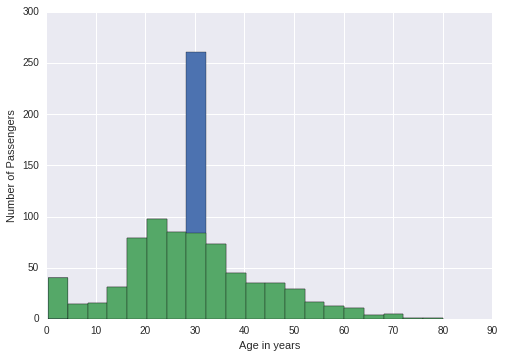

In [5]:
mean_age = np.round(np.mean(titanic_df['Age']),decimals=1)
titanic_age_orig = titanic_df['Age']
titanic_age_mean = titanic_df['Age'].fillna(mean_age)
print 'Age distributions'

ax=titanic_age_mean.hist(bins=20)
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of Passengers')
titanic_age_orig.hist(ax=ax,bins=20)

<font color='green'> From the age distributions of original values and with subsituted nulls, the mean(age) value is extremely over-represented in the dataset to the point where it does not resemble the original dataset. This is a big issue that could affect future statistical testing and analyses. And is the limitation to this data.</font>

Age distributions


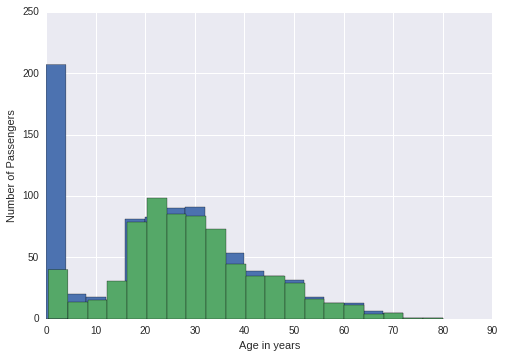

In [6]:
titanic_age_orig = titanic_df['Age']
titanic_age_zero = titanic_df['Age'].fillna(0)
print 'Age distributions'

ax=titanic_age_zero.hist(bins=20)
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of Passengers')
titanic_age_orig.hist(ax=ax,bins=20)

<font color='green'> From the age distributions of original values and with subsituted nulls, zero value substitutes creates outliers in the dataset to the point where it does not resemble the original dataset. This could again affect future statistical testing and analyses. And is the limitation to this data.</font>

#Similarly below code will replace NaNs in all fields with zeroes in original titanic dataframe

titanic_df.fillna(0, inplace= True)

titanic_df.fillna(mean_age, inplace= True)

#Below code will replace NaNs in field Cabin separately with spaces

titanic_df['Cabin'].fillna(' ', inplace= True)

titanic_df['Embarked'].fillna('',inplace=True)

<font color='green'> For keeping the age analysis unbiased NaNs are ignored here </font>

In [8]:
#who was the youngest passenger
print 'Youngest Passenger'
print titanic_df.loc[titanic_df['Age'].idxmin(skipna=True)]

#who was the oldest passenger
print 'Oldest Passenger'
print titanic_df.loc[titanic_df['Age'].idxmax(skipna=True)]

Youngest Passenger
PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object
Oldest Passenger
PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch      

<font color='green'> Both Youngest and oldest passengers survived. Youngest passenger belonged to class 3 and oldest to class 1. </font>

In [9]:
titanic_survivors = titanic_df[titanic_df['Survived']==1]
titanic_non_survivors = titanic_df[titanic_df['Survived']==0]

In [10]:
# function to create plots for a particular variable
def create_compare_plots(df1,df2,key,kind,xlabel,ylabel,title):
    ax=df1[key].value_counts().plot(kind=kind)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    df2[key].value_counts().plot(ax=ax,kind=kind,color='r')

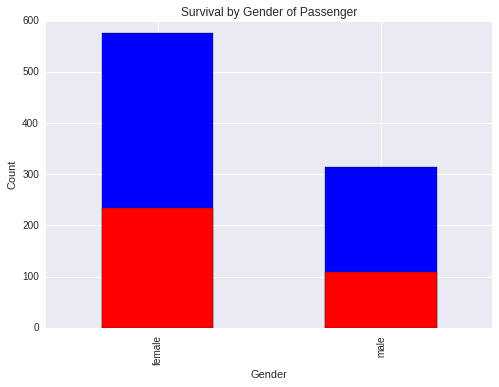

In [11]:
#How survival depended on gender of person
create_compare_plots(titanic_df,titanic_survivors,'Sex','bar','Gender','Count','Survival by Gender of Passenger')

<font color='green'> About 38% of total females survived the disaster
About 34% of total males survived the disaster</font>

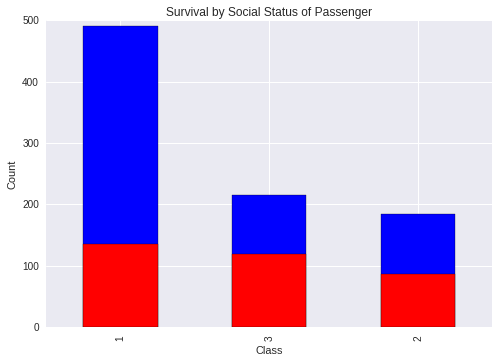

In [12]:
#How survival depended on Class of a person
create_compare_plots(titanic_df,titanic_survivors,'Pclass','bar','Class','Count','Survival by Social Status of Passenger')

<font color='green'> About 29% of class 1, 49% of class 2 and 56% of class 3 passangers survived. Class of passanger might play a role in location proximity and accessibility of passenger to the life boats.</font>

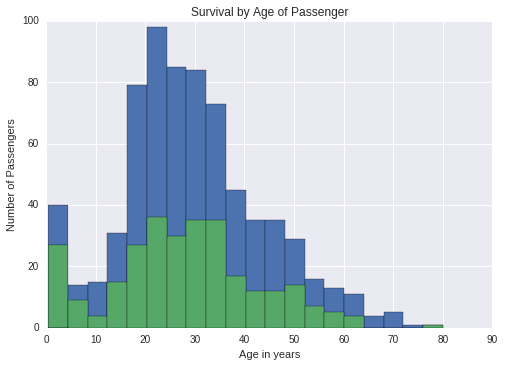

In [13]:
#How survival depended on age of a person
#create_compare_plots(titanic_df,titanic_survivors,'Age','hist')

ax=titanic_df['Age'].hist(bins=20)
ax.set_xlabel('Age in years')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survival by Age of Passenger')
titanic_survivors['Age'].hist(ax=ax,bins=20)

<font color='green'> The graph above describes the survival based on age. As age increases the survival ratio decreased. Yet status of passenger could have influenced securing a seat on life boat</font>

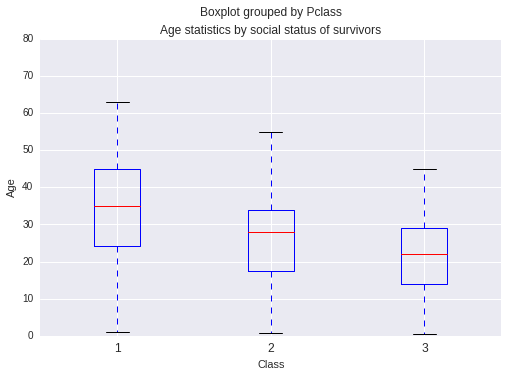

In [14]:
# How does the age/status graph looked for survivors/non survivors? 
#Survival box plots of passenger age by pclass
titanic_survivors.boxplot(column=['Age'],by='Pclass')

plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Age statistics by social status of survivors')

<font color='green'> Average ages for survival for class 1, 2 and 3 were 35, 28, 23 respectively. Lowest age of survival was a year or less for all three classes. Highest age of survival increased with status/class of passanger, with highest ages being 63, 55, 45 for class 1, 2 and 3 respectively</font>

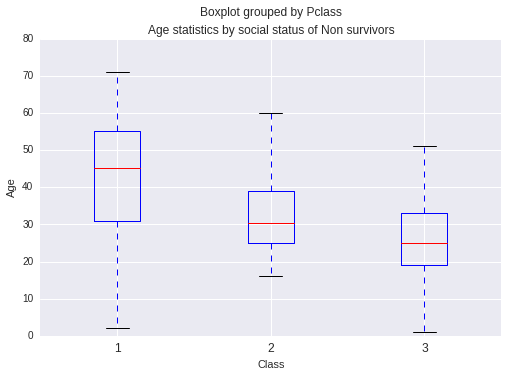

In [15]:
#Non Survival box plots of passenger age by Pclass
titanic_non_survivors.boxplot(column=['Age'],by='Pclass')
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Age statistics by social status of Non survivors')

<font color='green'> Average ages for non survival for class 1, 2 and 3 were 45, 30, 25 respectively. Lowest age of non survival was under 3 years for class 1 and class 3, and above 15 years for class 2. Highest age of non survival increased with status/class of passanger, with highest ages being 71, 60, 51 for class 1, 2 and 3 respectively.</font>

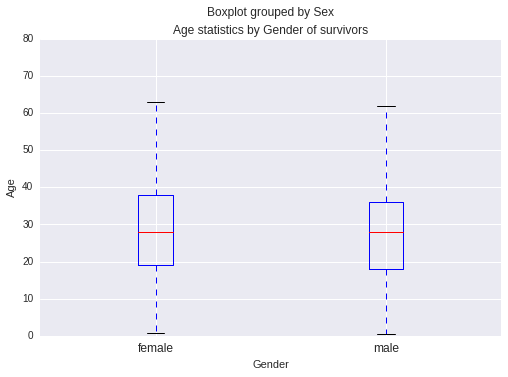

In [16]:
# How does the age/gender graph looked for survivors/non survivors? 
#Survival box plots of passenger age by gender
titanic_survivors.boxplot(column=['Age'],by='Sex')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age statistics by Gender of survivors')

<font color='green'> Average, minimum and maximum ages of survivor males and females were about the same. Average around 28, min around 1, max around 63 </font>

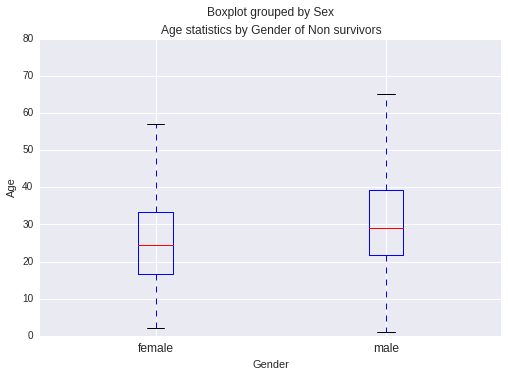

In [17]:
#Non Survival box plots of passenger age by gender
titanic_non_survivors.boxplot(column=['Age'],by='Sex')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age statistics by Gender of Non survivors')

<font color='green'> Minimum age of female non survivors (2) was slightly greater than that of male non survivors (under 1). Average age of female non survivors (25) was less than that of male non survivors (29). Max age of female non survivors (57) was less than that of male non survivors(65) </font>

# What factors made people more likely to survive?
<font color='green'> By the graphs above 'Survived' is dependent variable, that varies with independent variables 'Age', 'Pclass', 'Sex'. There seem to be a definite correlation between survival probability and these independent variables. Yet the statistics do not prove that being less in age, higher in class and female gender caused survival.

There could be few more dependency like presence of relatives 'Parch' (parents), 'Sibsp' (siblings), travelling nanny, location of 'Cabin' that could have affected the likelyhood of survival.</font>

In [18]:
#Describe of data of non surviving children per class
total_children = titanic_df[titanic_df['Age']<=14]
unsaved_children = titanic_non_survivors[titanic_non_survivors['Age']<=14]

total_child_count = total_children.groupby('Pclass').size()
unsaved_child_count = unsaved_children.groupby('Pclass').size()

print 'Percent of children unsaved grouped by class' 
print ((unsaved_child_count * 100)/total_child_count).fillna(0)
print

male_unsaved_children = unsaved_children[unsaved_children['Sex']=='male']
female_unsaved_children = unsaved_children[unsaved_children['Sex']=='female']

print 'Male Child passanger who did not make it to safety '
print male_unsaved_children[['Age','SibSp','Parch','Pclass']].describe()
print

print 'Female Child passanger who did not make it to safety '
print female_unsaved_children[['Age','SibSp','Parch','Pclass']].describe()

print

print 'Unsaved female child count by class '
print female_unsaved_children.groupby('Pclass').size()
print

print 'Unsaved male child count by class '
print male_unsaved_children.groupby('Pclass').size()
print

print 'Only female child unsaved passenger who did not belong to class 3'
print female_unsaved_children[female_unsaved_children['Pclass']!=3]

Percent of children unsaved grouped by class
Pclass
1    20.000000
2     0.000000
3    58.490566
dtype: float64

Male Child passanger who did not make it to safety 
             Age      SibSp      Parch  Pclass
count  18.000000  18.000000  18.000000      18
mean    6.666667   3.833333   1.388889       3
std     4.338609   1.150447   0.607685       0
min     1.000000   0.000000   0.000000       3
25%     2.500000   4.000000   1.000000       3
50%     7.000000   4.000000   1.000000       3
75%     9.750000   4.000000   2.000000       3
max    14.000000   5.000000   2.000000       3

Female Child passanger who did not make it to safety 
             Age      SibSp      Parch     Pclass
count  14.000000  14.000000  14.000000  14.000000
mean    6.857143   2.285714   1.571429   2.857143
std     3.997252   1.589803   0.646206   0.534522
min     2.000000   0.000000   0.000000   1.000000
25%     2.250000   1.000000   1.000000   3.000000
50%     8.500000   3.000000   2.000000   3.000000
75%    

In [19]:
#Describe data of non surviving adults per class
total_adults = titanic_df[titanic_df['Age']>14]
unsaved_adults = titanic_non_survivors[titanic_non_survivors['Age']>14]

total_adult_count = total_adults.groupby('Pclass').size()
unsaved_adult_count = unsaved_adults.groupby('Pclass').size()

print 'Percent of adults unsaved grouped by class' 
print ((unsaved_adult_count * 100)/total_adult_count).fillna(0)
print

male_unsaved_adults = unsaved_adults[unsaved_adults['Sex']=='male']
female_unsaved_adults = unsaved_adults[unsaved_adults['Sex']=='female']

print 'Male adult passangers who did not make it to safety '
print male_unsaved_adults[['Age','SibSp','Parch','Pclass']].describe()
print

print 'Female adult passangers who did not make it to safety '
print female_unsaved_adults[['Age','SibSp','Parch','Pclass']].describe()
print

print 'Unsaved male adult count by class '
print male_unsaved_adults.groupby('Pclass').size()
print

print 'Unsaved female adult count by class '
print female_unsaved_adults.groupby('Pclass').size()
print

print 'Female adult unsaved passengers who did not belong to class 3'
print female_unsaved_adults[female_unsaved_adults['Pclass']!=3]
print

print 'Cabin C22-C26 passengers'
print titanic_df[titanic_df['Cabin'].str.contains("C22 C26")==True]
print

print 'Records for Allison family'
print male_unsaved_adults[male_unsaved_adults['Name'].str.contains("Allison")==True]
print titanic_df[titanic_df['Name'].str.contains("Allison")==True]
print

potential_nanny_ticket = titanic_df[titanic_df['Name'].str.contains("Allison, Master. Hudson Trevor")==True]['Ticket'].iloc[0]
print potential_nanny_ticket
print 'Records for nurse of only survivor of Allison family'
print  titanic_df[(titanic_df['Ticket'].str.contains(potential_nanny_ticket)==True)&(titanic_df['Cabin'].isnull())]
print

Percent of adults unsaved grouped by class
Pclass
1    34.806630
2    58.441558
3    79.139073
dtype: float64

Male adult passangers who did not make it to safety 
              Age       SibSp       Parch      Pclass
count  342.000000  342.000000  342.000000  342.000000
mean    32.931287    0.269006    0.178363    2.397661
std     13.132768    0.560821    0.583547    0.773305
min     15.000000    0.000000    0.000000    1.000000
25%     22.250000    0.000000    0.000000    2.000000
50%     30.000000    0.000000    0.000000    3.000000
75%     40.000000    0.000000    0.000000    3.000000
max     74.000000    4.000000    5.000000    3.000000

Female adult passangers who did not make it to safety 
             Age      SibSp      Parch     Pclass
count  50.000000  50.000000  50.000000  50.000000
mean   30.140000   0.600000   0.940000   2.800000
std    10.640239   0.857143   1.633951   0.494872
min    14.500000   0.000000   0.000000   1.000000
25%    21.250000   0.000000   0.000000   3.0

# No record for father Hudon Allison on the given titanic file 

<font color='green'> Master Hudson Trevor Allison, 11m, was born May 7, 1911 in Westmount, Quebec.

Shortly after Trevor was born, the Allison family travelled to England for business purposes, and it was in England that young Trevor was baptised.

He travelled on the Titanic with his father Hudson Allison his mother Bess Allison and sister Loraine. He was also accompanied by a nurse Alice Cleaver.

Of the Allison family, only baby Trevor was saved.

After the sinking, baby Trevor returned home to Canada, where he would be raised by his aunt and uncle, George and Lillian Allison.

Trevor died on 7 August 1929 at the age of 18 in Maine, USA of ptomaine poisoning and was buried beside his father in Chesterville, Ontario.
</font>

<font color='green'> Being a nanny of surviving child might have influenced survival of nurse Alice Cleaver in this scenario. Yet there is no substantial proof of this speculation </font>

In [20]:
# What was female child to male child ratio of survivors and non survivors

saved_children = titanic_survivors[titanic_survivors['Age']<=14]
female_saved_child = saved_children[saved_children['Sex']=='female']
male_saved_child = saved_children[saved_children['Sex']=='male']

female_vs_male_ratio = np.true_divide(female_saved_child.size,male_saved_child.size)
print 'Female to male child survival ratio in survivors '
print female_vs_male_ratio

female_vs_male_ratio_unsaved = np.true_divide(female_unsaved_children.size,male_unsaved_children.size)
print 'Female to male child survival ratio in non survivors '
print female_vs_male_ratio_unsaved


Female to male child survival ratio in survivors 
1.14285714286
Female to male child survival ratio in non survivors 
0.777777777778


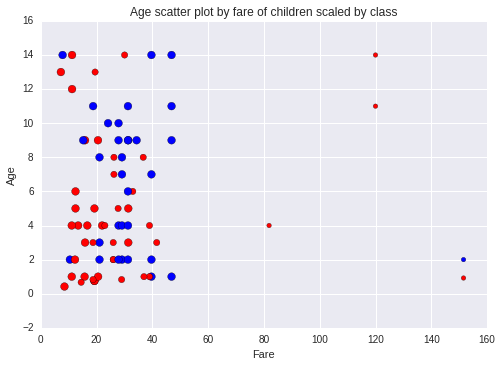

In [21]:
#Fare Vs Age Survival plot for children 
survive_color = np.where(total_children.Survived == 1,'r','b')
#If dot color is red then person survived, if dot color is blue then person died
#plt.legend('Survived','Died')
plt.scatter(total_children['Fare'],total_children['Age'],c=survive_color,s=(total_children['Pclass']*20))
plt.xlabel('Fare')
plt.ylabel('Age')

plt.title('Age scatter plot by fare of children scaled by class')

<font color='green'> The graph shows how saved child passangers varied by class and age. This graph is based on assumption that Fare is inversely proportional to class of passenger(First class passengers fare is higher than third class passengers). Red dots describe the passengers who survived and Blue dots who did not. Most of the first class child passengers were saved. Most of the children who did not survive the mishap were from class 1 and 3.</font> 

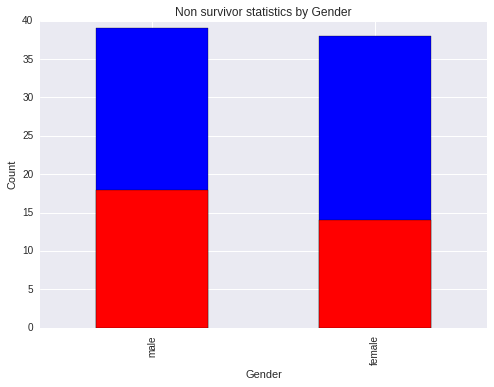

In [22]:
create_compare_plots(total_children,unsaved_children,'Sex','bar','Gender','Count','Non survivor statistics by Gender')

<font color='green'> About 46% of male children and 38% of female children travelling were not saved </font>

In [23]:
#How many families travelling remained intact
titanic_ticket_group = titanic_df.groupby('Ticket')
print 'Total number of families travelling were'
print len(titanic_ticket_group)

print 'Total number of people not travelling alone(family size greater than 1)'
family_tickets = titanic_ticket_group.filter(lambda x: len(x)>1)
print len(family_tickets)

num_family_split = 0
family_survived = family_tickets.groupby('Ticket')
for ticket in family_survived.groups.keys():
    if ticket in titanic_non_survivors.Ticket.values:
        num_family_split = num_family_split + 1

print 'Total number of families split in disaster'
print num_family_split


Total number of families travelling were
681
Total number of people not travelling alone(family size greater than 1)
344
Total number of families split in disaster
86


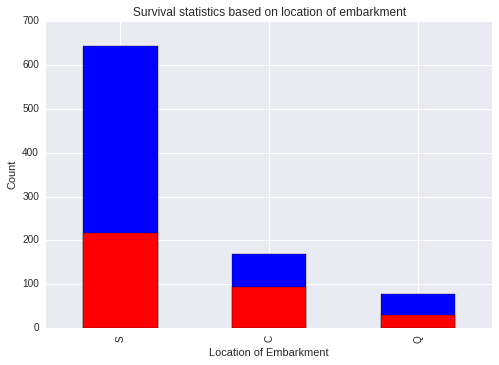

In [24]:
#describe the survival data by the location of embarkment
create_compare_plots(titanic_df,titanic_survivors,'Embarked','bar','Location of Embarkment','Count','Survival statistics based on location of embarkment')

<font color='green'> About 33% of people who embarked from Southampton survived, 55% from Cherbourg survived, 37% from Queenstown survived. The location of the passenger on ship might have played important role on boarding the rescue boats. And location of passenger could be proportional to class and port of embarkment. Location of embarkment could also affect the duration of time already on ship (being sea sick) and mental ability to make sane decisions to save lives </font>

<font color='green'> If there were a way to figure out which passengers were crew members, then it would have been interesting to see how these graphs change.</font>

<font color='green'> The analysis presumes that any passenger under age 14 is considered a child passenger. Yet considering the era titanic sailed, there could be nannies and mothers under age 14. Hence the age data is highly limited and this fact could have affected the analysis.  </font>